In [1]:
# dependencies
import pandas as pd
import numpy as np

In [2]:
# read in CSV
all_wines = pd.read_csv('Data/winemag-data-130k-v2.csv')
all_wines.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [3]:
# add vintage year based on year in title
all_wines['vintage'] = all_wines['title'].str.extract('(\d\d\d\d)', expand=True)

# filling in known variety for nulls
all_wines.iloc[86909, 7] = 'Syrah-Petite Sirah'

# drop unneeded columns
clean_wines = all_wines.drop(columns=['Unnamed: 0', 'description', 'designation', 'region_1', 'region_2', 'title', \
                                      'taster_name', 'taster_twitter_handle'])

# sample
clean_wines.sample(10)

,country,points,price,province,variety,winery,vintage
96457,Italy,86,10.0,Sicily & Sardinia,Pinot Grigio,MandraRossa,2008
81987,US,92,75.0,California,Chardonnay,Talbott,2003
52086,US,82,24.0,Washington,Syrah,Heaven's Cave,2008
63672,Italy,89,28.0,Tuscany,Sangiovese,Querceto di Castellina,2007
9946,US,89,18.0,California,Chardonnay,Wente,2006
34249,Italy,88,42.0,Central Italy,Cabernet Sauvignon,Drei Donà Tenuta La Palazza,2009
119526,US,92,30.0,California,Red Blend,Rubino Estates Winery,2014
104429,US,91,34.0,California,Sauvignon Blanc,Sidebar,2015
115293,US,89,25.0,California,Cabernet Franc,Roark Wine Co.,2011
54047,France,85,10.0,Southwest France,Rosé,Domaine de Ménard,2016


In [4]:
# filling in known country for nulls
has_country = clean_wines[pd.notnull(clean_wines['country'])]
has_country_series = pd.Series(data=has_country['country'].values, index=has_country['winery'])
has_country_dict = has_country_series.to_dict()
clean_wines.loc[clean_wines['country'].isnull(), 'country'] \
    = clean_wines['country'].fillna(clean_wines['winery'].map(has_country_dict))

# drop the remaining nulls
clean_wines = clean_wines.dropna()

# replace variety names with common wine names
clean_wines['variety'] = clean_wines['variety'].replace(['Weissburgunder'], 'Chardonnay')
clean_wines['variety'] = clean_wines['variety'].replace(['Spatburgunder'], 'Pinot Noir')
clean_wines['variety'] = clean_wines['variety'].replace(['Grauburgunder'], 'Pinot Gris')
clean_wines['variety'] = clean_wines['variety'].replace(['Garnacha'], 'Grenache')
clean_wines['variety'] = clean_wines['variety'].replace(['Pinot Nero'], 'Pinot Noir')
clean_wines['variety'] = clean_wines['variety'].replace(['Alvarinho'], 'Albarino')

# sample
clean_wines.sample(10)

,country,points,price,province,variety,winery,vintage
73648,Germany,89,22.0,Mosel,Riesling,Richard Böcking,2012
82652,US,91,38.0,California,Pinot Noir,Balletto,2011
8894,France,93,138.0,Burgundy,Pinot Noir,Domaine Jacques Prieur,2009
63765,France,95,109.0,Burgundy,Chardonnay,Louis Jadot,2014
128521,US,89,20.0,Washington,Malbec,Vino La Monarcha,2014
110057,US,92,56.0,California,Pinot Noir,MacRostie,2013
112577,US,88,17.0,California,Pinot Gris,Tangent,2006
43038,Italy,87,18.0,Northeastern Italy,Pinot Grigio,Cantina Produttori Bolzano,2014
63054,France,85,12.0,Provence,Rosé,Barton & Guestier,2011
42054,US,85,20.0,California,Cabernet Sauvignon,BonAnno,2008


count    116778.000000
mean         88.457406
std           3.045578
min          80.000000
25%          86.000000
50%          88.000000
75%          91.000000
max         100.000000
Name: points, dtype: float64

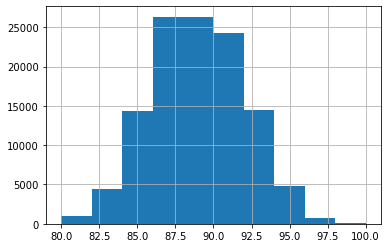

In [5]:
# plot histogram
clean_wines['points'].hist()

# decribe dataframe
clean_wines['points'].describe()

In [6]:
# add rating
clean_wines['quality'] = clean_wines['points'].apply(lambda x: 'Good' if x >= 88 else 'Poor')
clean_wines = clean_wines.drop(columns = ['points'])

# create export of final dataframe
clean_wines.to_csv('Data/recommend_neural_model_df.csv')

# sample
clean_wines.sample(10)

,country,price,province,variety,winery,vintage,quality
42854,US,20.0,Oregon,Pinot Noir,A to Z,2012,Poor
63273,Argentina,15.0,Mendoza Province,Cabernet Franc,Zorzal,2015,Good
11712,Germany,31.0,Mosel,Riesling,Reichsgraf von Kesselstatt,2012,Good
40755,US,12.0,Oregon,Pinot Gris,Château Bianca,2008,Poor
127231,Italy,17.0,Tuscany,Red Blend,Suberli,2013,Poor
68607,Italy,36.0,Northeastern Italy,Sauvignon,Elena Walch,2009,Good
85930,Italy,16.0,Piedmont,Barbera,Guido Berta,2015,Good
101789,US,39.0,Washington,Red Blend,Baer,2013,Good
92205,France,20.0,Bordeaux,Bordeaux-style Red Blend,Château de Tourteyron,2014,Poor
95101,US,30.0,Washington,Merlot,Apex,2014,Good


In [7]:
# LabelEncoder dependency
from sklearn.preprocessing import LabelEncoder

# create features
number = LabelEncoder()
features = clean_wines[['country','price','province','variety','winery','vintage']]
features['country'] = number.fit_transform(features['country'].astype('str'))
features['province'] = number.fit_transform(features['province'].astype('str'))
features['variety'] = number.fit_transform(features['variety'].astype('str'))
features['winery'] = number.fit_transform(features['winery'].astype('str'))

# features 
features.sample(10)

C:\Users\Rahil\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\Rahil\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Rahil\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

,country,price,province,variety,winery,vintage
91605,14,18.0,47,121,5772,2013
82826,39,38.0,261,462,14193,2015
14992,39,36.0,51,458,168,2009
29793,39,42.0,51,673,14349,2011
7134,14,20.0,178,458,4417,2010
70594,39,45.0,51,121,1154,2012
5426,39,12.0,51,76,14104,2013
115097,0,20.0,210,271,13434,2009
96606,35,18.0,338,427,15038,1998
56382,39,50.0,51,423,4381,2006


In [8]:
X = features
y = clean_wines['quality'].astype('category')

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=17)
X_train.head()

,country,price,province,variety,winery,vintage
100326,39,30.0,51,8,1610,2016
17304,8,20.0,61,495,9900,2013
45169,2,13.0,406,516,15303,2007
61058,3,29.0,378,462,7517,2014
31290,0,35.0,210,271,386,2013


In [10]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.utils import to_categorical

X_scaler = StandardScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

# Step 2: Convert encoded labels to one-hot-encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units=200, activation='relu', input_dim=6))
model.add(Dense(units=200, activation='relu'))
model.add(Dense(units=2, activation='softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 200)               1400      
_________________________________________________________________
dense_1 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 402       
Total params: 42,002
Trainable params: 42,002
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

Epoch 1/100
2737/2737 - 3s - loss: 0.5329 - accuracy: 0.7330
Epoch 2/100
2737/2737 - 2s - loss: 0.5188 - accuracy: 0.7426
Epoch 3/100
2737/2737 - 3s - loss: 0.5138 - accuracy: 0.7457
Epoch 4/100
2737/2737 - 2s - loss: 0.5120 - accuracy: 0.7463
Epoch 5/100
2737/2737 - 2s - loss: 0.5132 - accuracy: 0.7485
Epoch 6/100
2737/2737 - 2s - loss: 0.5083 - accuracy: 0.7491
Epoch 7/100
2737/2737 - 2s - loss: 0.5072 - accuracy: 0.7495
Epoch 8/100
2737/2737 - 2s - loss: 0.5105 - accuracy: 0.7499
Epoch 9/100
2737/2737 - 2s - loss: 0.5051 - accuracy: 0.7506
Epoch 10/100
2737/2737 - 2s - loss: 0.5038 - accuracy: 0.7515
Epoch 11/100
2737/2737 - 2s - loss: 0.5035 - accuracy: 0.7515
Epoch 12/100
2737/2737 - 2s - loss: 0.5051 - accuracy: 0.7526
Epoch 13/100
2737/2737 - 2s - loss: 0.5012 - accuracy: 0.7527
Epoch 14/100
2737/2737 - 2s - loss: 0.5004 - accuracy: 0.7527
Epoch 15/100
2737/2737 - 2s - loss: 0.5045 - accuracy: 0.7539
Epoch 16/100
2737/2737 - 2s - loss: 0.4983 - accuracy: 0.7548
Epoch 17/100
2737

In [14]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

913/913 - 1s - loss: 0.5360 - accuracy: 0.7532
Normal Neural Network - Loss: 0.5359588265419006, Accuracy: 0.7531769275665283


In [15]:
encoded_predictions = model.predict_classes(X_test_scaled[:])
prediction_labels = label_encoder.inverse_transform(encoded_predictions)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [16]:
d = {'prediction' : prediction_labels, 
     'actual' : y_test}

In [17]:
predictions_df = pd.DataFrame(data=d)
predictions_df

,prediction,actual
114575,Good,Good
126892,Poor,Poor
110324,Good,Good
49025,Poor,Poor
93635,Good,Good
...,...,...
34317,Good,Poor
53872,Good,Good
120987,Poor,Poor
114969,Poor,Poor


In [18]:
predictions_df.to_csv('Data/recommend_neural_model_predictions_df.csv')